In [3]:
import pandas as pd

# Load the dataset
file_path = 'Stress.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset and its general information
data.head(), data.info(), data.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subreddit         2838 non-null   object 
 1   post_id           2838 non-null   object 
 2   sentence_range    2838 non-null   object 
 3   text              2838 non-null   object 
 4   label             2838 non-null   int64  
 5   confidence        2838 non-null   float64
 6   social_timestamp  2838 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 155.3+ KB


(          subreddit post_id sentence_range  \
 0              ptsd  8601tu       (15, 20)   
 1        assistance  8lbrx9         (0, 5)   
 2              ptsd  9ch1zh       (15, 20)   
 3     relationships  7rorpp        [5, 10]   
 4  survivorsofabuse  9p2gbc         [0, 5]   
 
                                                 text  label  confidence  \
 0  He said he had not felt that way before, sugge...      1         0.8   
 1  Hey there r/assistance, Not sure if this is th...      0         1.0   
 2  My mom then hit me with the newspaper and it s...      1         0.8   
 3  until i met my new boyfriend, he is amazing, h...      1         0.6   
 4  October is Domestic Violence Awareness Month a...      1         0.8   
 
    social_timestamp  
 0        1521614353  
 1        1527009817  
 2        1535935605  
 3        1516429555  
 4        1539809005  ,
 None,
        subreddit post_id sentence_range  \
 count       2838    2838           2838   
 unique        10    234

In [4]:
import re

# Function to clean and standardize the sentence_range column
def clean_sentence_range(range_str):
    range_str = re.sub(r'[^\d,]', '', range_str)  # Remove all except digits and comma
    start, end = map(int, range_str.split(','))
    return start, end

# Apply the cleaning function to the sentence_range column
data['sentence_start'], data['sentence_end'] = zip(*data['sentence_range'].apply(clean_sentence_range))
data.drop(columns='sentence_range', inplace=True)  # Drop the original sentence_range column

# Convert social_timestamp to a readable date-time format
data['social_datetime'] = pd.to_datetime(data['social_timestamp'], unit='s')

# Basic text cleaning
data['clean_text'] = data['text'].str.lower()  # Convert text to lowercase
data['clean_text'] = data['clean_text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))  # Remove punctuation

# Show the updated DataFrame and check types
data.head(), data.dtypes


(          subreddit post_id  \
 0              ptsd  8601tu   
 1        assistance  8lbrx9   
 2              ptsd  9ch1zh   
 3     relationships  7rorpp   
 4  survivorsofabuse  9p2gbc   
 
                                                 text  label  confidence  \
 0  He said he had not felt that way before, sugge...      1         0.8   
 1  Hey there r/assistance, Not sure if this is th...      0         1.0   
 2  My mom then hit me with the newspaper and it s...      1         0.8   
 3  until i met my new boyfriend, he is amazing, h...      1         0.6   
 4  October is Domestic Violence Awareness Month a...      1         0.8   
 
    social_timestamp  sentence_start  sentence_end     social_datetime  \
 0        1521614353              15            20 2018-03-21 06:39:13   
 1        1527009817               0             5 2018-05-22 17:23:37   
 2        1535935605              15            20 2018-09-03 00:46:45   
 3        1516429555               5            10 2

In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Set up stopwords and the lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to tokenize, remove stopwords, and lemmatize
def preprocess_text(text):
    tokens = word_tokenize(text)
    filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and word.isalpha()]
    return ' '.join(filtered_tokens)

# Apply the preprocessing function to the clean_text column
data['processed_text'] = data['clean_text'].apply(preprocess_text)

# Show the first few entries of the processed text
data[['text', 'clean_text', 'processed_text']].head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saiki\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saiki\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saiki\AppData\Roaming\nltk_data...


,text,clean_text,processed_text
0,"He said he had not felt that way before, sugge...",he said he had not felt that way before sugget...,said felt way suggeted go rest trigger ahead y...
1,"Hey there r/assistance, Not sure if this is th...",hey there rassistance not sure if this is the ...,hey rassistance sure right place post go im cu...
2,My mom then hit me with the newspaper and it s...,my mom then hit me with the newspaper and it s...,mom hit newspaper shocked would know dont like...
3,"until i met my new boyfriend, he is amazing, h...",until i met my new boyfriend he is amazing he ...,met new boyfriend amazing kind sweet good stud...
4,October is Domestic Violence Awareness Month a...,october is domestic violence awareness month a...,october domestic violence awareness month dome...


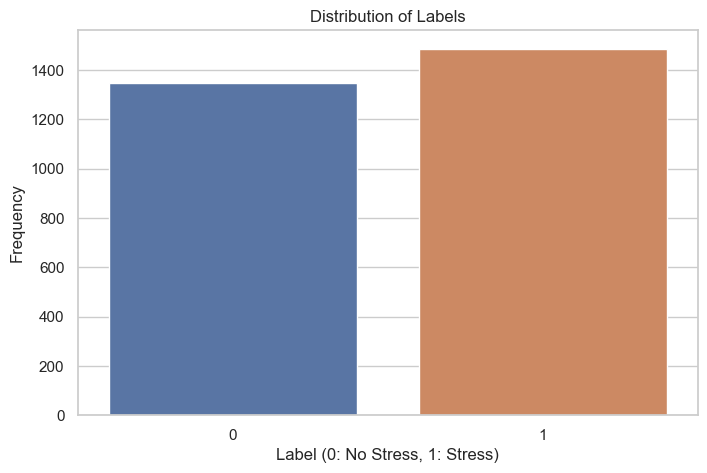

label
1    0.524313
0    0.475687
Name: proportion, dtype: float64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up visualizations
sns.set(style="whitegrid")

# Plotting label distribution
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='label', data=data)
ax.set_title('Distribution of Labels')
ax.set_xlabel('Label (0: No Stress, 1: Stress)')
ax.set_ylabel('Frequency')
plt.show()

# Calculate label balance
label_balance = data['label'].value_counts(normalize=True)
label_balance


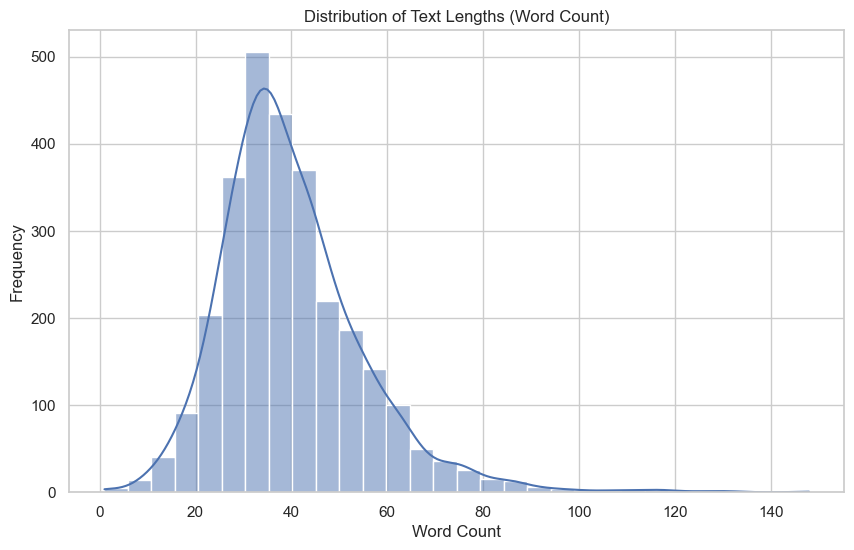

count    2838.000000
mean       39.991896
std        15.068155
min         1.000000
25%        30.000000
50%        38.000000
75%        47.000000
max       148.000000
Name: word_count, dtype: float64

In [8]:
# Calculate word count for each text entry
data['word_count'] = data['processed_text'].apply(lambda x: len(x.split()))

# Plotting the distribution of text lengths
plt.figure(figsize=(10, 6))
sns.histplot(data['word_count'], bins=30, kde=True)
plt.title('Distribution of Text Lengths (Word Count)')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# Descriptive statistics for word count
data['word_count'].describe()


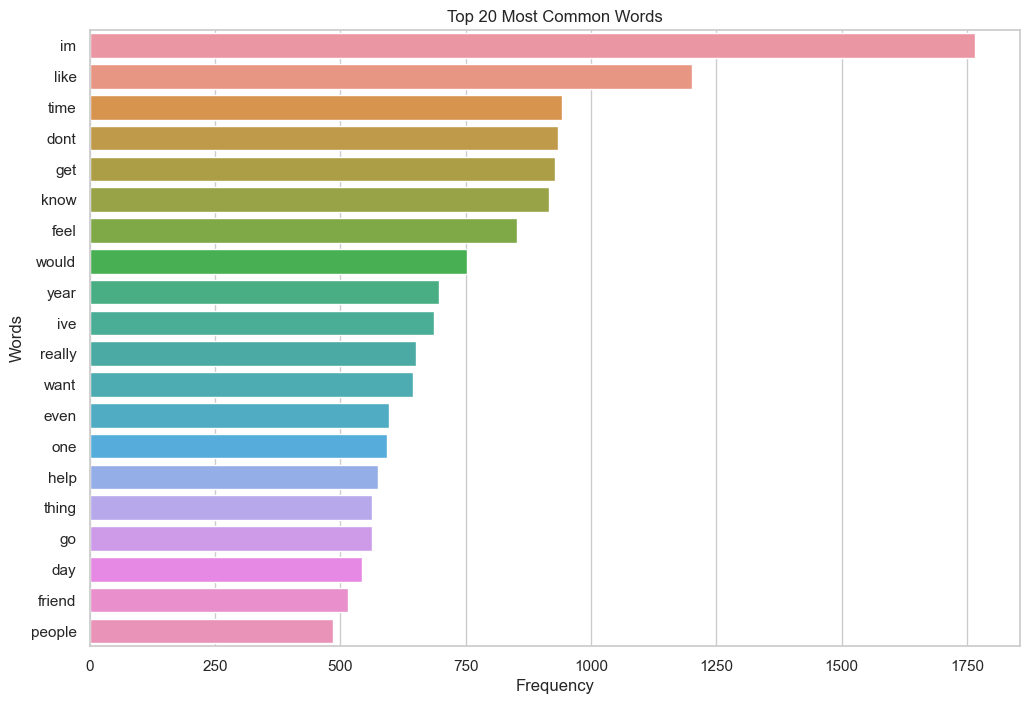

[('im', 1767),
 ('like', 1202),
 ('time', 943),
 ('dont', 934),
 ('get', 928),
 ('know', 917),
 ('feel', 852),
 ('would', 753),
 ('year', 697),
 ('ive', 686),
 ('really', 650),
 ('want', 644),
 ('even', 597),
 ('one', 594),
 ('help', 575),
 ('thing', 564),
 ('go', 563),
 ('day', 544),
 ('friend', 516),
 ('people', 485)]

In [10]:
from collections import Counter

# Aggregate all words into a single list
all_words = []
for text in data['processed_text']:
    all_words.extend(text.split())

# Count the frequency of each word
word_counts = Counter(all_words)

# Most common words
most_common_words = word_counts.most_common(20)

# Plotting the most common words
plt.figure(figsize=(12, 8))
sns.barplot(x=[word[1] for word in most_common_words], y=[word[0] for word in most_common_words], orient='h')
plt.title('Top 20 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

most_common_words


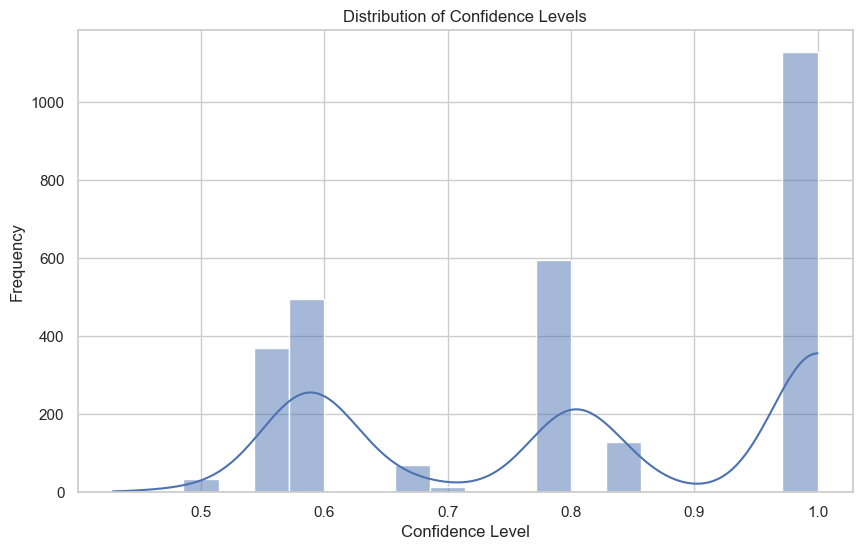

count    2838.000000
mean        0.808972
std         0.177038
min         0.428571
25%         0.600000
50%         0.800000
75%         1.000000
max         1.000000
Name: confidence, dtype: float64

In [11]:
# Plotting the distribution of confidence levels
plt.figure(figsize=(10, 6))
sns.histplot(data['confidence'], bins=20, kde=True)
plt.title('Distribution of Confidence Levels')
plt.xlabel('Confidence Level')
plt.ylabel('Frequency')
plt.show()

# Descriptive statistics for confidence
data['confidence'].describe()


In [17]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(data['processed_text'], data['label'], test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Set maximum number of words to keep, based on word frequency
max_words = 10000
# Set maximum length of sequences, based on your EDA
max_length = 50

# Tokenization
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

# Convert text to sequences of integers
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding sequences to ensure uniform input size
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, truncating='post', padding='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_length, truncating='post', padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, truncating='post', padding='post')



In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# RNN model architecture
rnn_model = Sequential()
rnn_model.add(Embedding(max_words, 32, input_length=max_length))
rnn_model.add(SimpleRNN(64, return_sequences=False))
rnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



In [20]:
# RNN model training
rnn_history = rnn_model.fit(X_train_pad, y_train, epochs=10, validation_data=(X_val_pad, y_val))

# Transformer model training (similar to RNN, replace 'rnn_model' with your Transformer model variable)
# transformer_history = transformer_model.fit(...)

# Evaluation on the test set
rnn_test_loss, rnn_test_acc = rnn_model.evaluate(X_test_pad, y_test)
print('RNN Test Loss:', rnn_test_loss)
print('RNN Test Accuracy:', rnn_test_acc)

# Transformer model evaluation
# transformer_test_loss, transformer_test_acc = transformer_model.evaluate(...)



Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5225 - loss: 0.6961 - val_accuracy: 0.5563 - val_loss: 0.6868
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6685 - loss: 0.6050 - val_accuracy: 0.5246 - val_loss: 0.7518
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9364 - loss: 0.2769 - val_accuracy: 0.5141 - val_loss: 0.9247
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9916 - loss: 0.0797 - val_accuracy: 0.5282 - val_loss: 1.0979
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9977 - loss: 0.0178 - val_accuracy: 0.5739 - val_loss: 1.0898
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9995 - loss: 0.0059 - val_accuracy: 0.5493 - val_loss: 1.1603
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9983 - loss: 0.0074 - val_accuracy: 0.5704 - val_loss: 1.2624
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9993 - loss: 0.0046 - val_accuracy: 0.5775 - val_loss:

In [24]:
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential(
            [Dense(ff_dim, activation="relu"), Dense(embed_dim)]
        )
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training=None):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

    # Add a get_config method to your custom layer
    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'embed_dim': self.att._num_heads,  # Change this to your actual parameters
            'num_heads': self.att._key_dim,
            'ff_dim': self.ffn.layers[0].units,
            'rate': self.dropout1.rate,
        })
        return config




In [25]:
inputs = Input(shape=(max_length,))
embedding_layer = Embedding(max_words, embed_dim)(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)(embedding_layer, training=True)  # Specify the training argument
x = GlobalAveragePooling1D()(transformer_block)
x = Dropout(0.1)(x)
x = Dense(20, activation="relu")(x)
x = Dropout(0.1)(x)
outputs = Dense(1, activation="sigmoid")(x)
transformer_model = Model(inputs=inputs, outputs=outputs)

transformer_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                          loss="binary_crossentropy",
                          metrics=["accuracy"])


In [26]:
history = transformer_model.fit(
    X_train_pad, y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_val_pad, y_val)
)


Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5848 - loss: 0.6753 - val_accuracy: 0.6761 - val_loss: 0.5934
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8162 - loss: 0.4489 - val_accuracy: 0.7042 - val_loss: 0.5811
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9236 - loss: 0.2176 - val_accuracy: 0.6761 - val_loss: 0.7448
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9422 - loss: 0.1547 - val_accuracy: 0.6761 - val_loss: 0.9375
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9921 - loss: 0.0402 - val_accuracy: 0.6901 - val_loss: 1.2303
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9892 - loss: 0.0390 - val_accuracy: 0.7007 - val_loss: 1.3677
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9947 - loss: 0.0150 - val_accuracy: 0.6866 - val_loss: 1.4752
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9975 - loss: 0.0118 - val_accuracy: 0.6901 - val_loss:

In [27]:
# Evaluate the Transformer model on the test set
test_loss, test_accuracy = transformer_model.evaluate(X_test_pad, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Generate predictions
predictions = transformer_model.predict(X_test_pad)

# Since the output will be in probabilities (due to sigmoid activation), 
# you'll need to convert these to binary predictions:
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]

# Now let's compare the binary predictions with the true labels
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, binary_predictions))
print(confusion_matrix(y_test, binary_predictions))



9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7526 - loss: 1.2112 
Test Loss: 1.3470200300216675
Test Accuracy: 0.7429577708244324
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
              precision    recall  f1-score   support

           0       0.75      0.69      0.72       137
           1       0.73      0.79      0.76       147

    accuracy                           0.74       284
   macro avg       0.74      0.74      0.74       284
weighted avg       0.74      0.74      0.74       284

[[ 95  42]
 [ 31 116]]
